🐝💻 Truly a buzz-worthy battle between Python and SAS as we compare their skills in visualizing native versus non-native flowering plants! Watch as Python whips up colorful heat maps and SAS turns data into dazzling visuals. Who will create the most vibrant bloom? Let’s dive in and see which tool gets the hive buzzing! 🌸📊✨

In [21]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#Load sas dataset into a pandas dataframe using the pandas read_sas method
df4=pd.read_csv('/workspaces/myfolder/SASInnovate25/native_vs_nonnative_bumblebee_sighting_pollinators_of_farm_data_for_publication.csv' , encoding='latin-1')

In [22]:
#We want to plot a heatmap of months in which the plants flower, assuming we have all flowering plants in the data

# Confirm date column is datetime
df4['date'] = pd.to_datetime(df4['date'], errors='coerce')

# Extract only the needed columns (make sure these column names exist)
df4 = df4[['year','plot','date','plant species']]

#Create new columns from date
df4['month'] = df4['date'].dt.month
df4['year'] = df4['date'].dt.year
df4.head(10)

,year,plot,date,plant species,month
0,2016,non-native,2016-09-21,Trifolium repens,9
1,2016,non-native,2016-09-21,Cosmos bipinnatus,9
2,2016,non-native,2016-09-21,Cosmos bipinnatus,9
3,2016,native,2016-09-21,Monarda punctata,9
4,2016,native,2016-09-21,Monarda punctata,9
5,2016,native,2016-09-21,Monarda punctata,9
6,2016,native,2016-09-21,Bidens aristosa,9
7,2016,native,2016-09-21,Bidens aristosa,9
8,2016,native,2016-09-21,Bidens aristosa,9
9,2016,native,2016-09-21,Bidens aristosa,9


In [23]:
#Turn the months into dummy coded columns that we can sum over using get_dummies

#Pandas library function that converts categorical variable(s) into dummy/indicator variables (one-hot encoded format).
df4 = pd.get_dummies(df4, columns=['month'], dtype=float) 

#Rename months for clarity and plotting
df4.rename(columns=dict(month_4='4',month_5='5',month_6='6',month_7='7',month_8='8',month_9='9',month_10='10'), inplace=True)

df4.head(10)

,year,plot,date,plant species,4,5,6,7,8,9,10
0,2016,non-native,2016-09-21,Trifolium repens,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016,non-native,2016-09-21,Cosmos bipinnatus,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016,non-native,2016-09-21,Cosmos bipinnatus,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2016,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2016,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2016,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2016,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2016,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2016,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2016,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#Separate data into native and non-native plants for plotting a heatmap
native_df = df4[df4['plot']=='native']
non_native_df = df4[df4['plot']=='non-native']

#Roll up data to get number of records for each plant for each month
native_plot = native_df.groupby(['plant species','year'])[['4','5','6','7','8','9','10']].agg('sum')
non_native_plot = non_native_df.groupby(['plant species','year'])[['4','5','6','7','8','9','10']].agg('sum')

native_plot.head()

4    5     6     7     8     9   10
plant species            year                                       
Asclepias tuberosa       2017  0.0  0.0  20.0   0.0   0.0   0.0  0.0
Bidens aristosa          2016  0.0  0.0   0.0   0.0   0.0  26.0  0.0
                         2017  0.0  0.0   0.0   0.0   0.0  24.0  2.0
Chamaecrista fasciculata 2016  0.0  0.0   0.0   4.0   0.0   0.0  0.0
                         2017  0.0  0.0   0.0  44.0  19.0   0.0  0.0

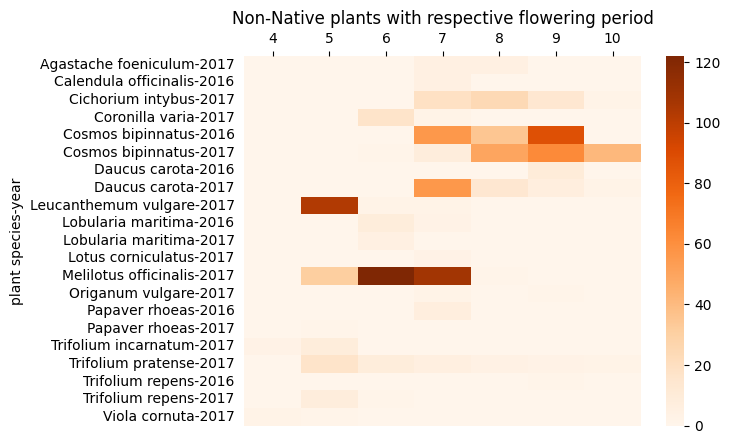

In [27]:
#create a heatmap for flowering period of non-native plants
ax = sns.heatmap(non_native_plot, cmap='Oranges')
ax.set_title('Non-Native plants with respective flowering period')
ax.xaxis.tick_top()
ax.tick_params(left=False)
plt.savefig('seaborn_plot.pdf', format='pdf')

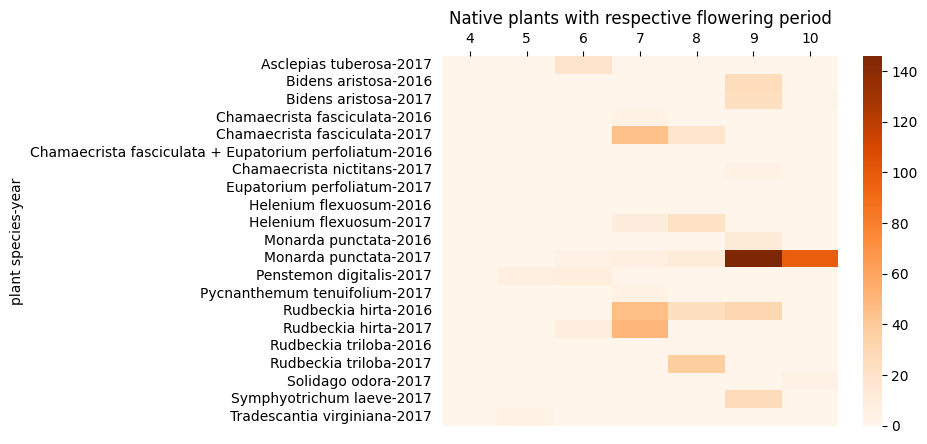

In [28]:
#create a heatmap for flowering period of native plants
ax = sns.heatmap(native_plot, cmap='Oranges') #Create the heatmap 
ax.set_title('Native plants with respective flowering period');
ax.xaxis.tick_top()
ax.tick_params(left=False)

Export results-heatmap to Pdf

In [30]:
#Open PDF File for Multiple Pages
with PdfPages('/workspaces/myfolder/SASInnovate25/multiple_plots.pdf') as pdf:
 
    plt.figure #Create and Save the First Plot
    ax = sns.heatmap(native_plot, cmap='Oranges') #Create the heatmap 
    ax.set_title('Native plants with respective flowering period');
    ax.xaxis.tick_top()
    ax.tick_params(left=False)
    pdf.savefig(bbox_inches='tight')  # Saves current figure to the PDF with a 
    #tight bounding box, that adjusts layout to fit plot content without extra whitespace.
    plt.close()    # Close the figure

    plt.figure
    ax = sns.heatmap(non_native_plot, cmap='Oranges')
    ax.set_title('Non-Native plants with respective flowering period')
    ax.xaxis.tick_top()
    ax.tick_params(left=False)
    pdf.savefig(bbox_inches='tight')  # Save the current figure into the PDF
    plt.close()    # Close the figure

#https://matplotlib.org/stable/gallery/color/colormap_reference.html
#above is a reference to the colormap if you want to change how the plot looks just change the cmap option

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#above is the doc page for the heatmap plot we are using